In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries Used

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import files
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from scipy.io import loadmat
import io
import cv2
import joblib
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# import wfdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler, TomekLinks 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from keras import layers
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D, BatchNormalization, Flatten, Dense
from keras.layers import MaxPool2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers.merge import concatenate
from keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras import regularizers
import random

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

# Functions for plotting accuracy, loss plots and HeatMap

In [ ]:
def plotting_epochs(training_, validation_, lossOrAccu):
  plt.figure(figsize=[6,4])
  plt.plot(training_, 'black', linewidth=2.0)
  plt.plot(validation_, 'blue', linewidth=2.0)
  plt.legend(['Training '+lossOrAccu, 'Validation '+lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

def heatMap(y_test, y_pred, figsize):
  log_cm = confusion_matrix(np.array(y_test).astype('int'), y_pred.astype('int'))

  f, p = plt.subplots(figsize=figsize)
  sns.heatmap(log_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
  plt.title('Confusion Matrix', size=16)
  plt.xlabel('Predicted Labels', size=14)
  plt.ylabel('Original Labels', size=14)
  plt.show()

In [ ]:
def checking_Unbiasity_MultiLabel(y, title): #'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6
    plt.figure(figsize=(7,6))
    labels = 'Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'

    a = y[y[:] == 0].size
    b = y[y[:] == 2].size
    c = y[y[:] == 3].size
    d = y[y[:] == 4].size
    e = y[y[:] == 5].size
    f = y[y[:] == 6].size
    sizes = [a,b,c,d,e,f]
    # colors = ['lightcoral', 'teal', 'skyblue']
    explode = (a/y.size, b/y.size, c/y.size, d/y.size, e/y.size, f/y.size) 
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, #colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

def checking_Unbiasity_BinaryLabel(y, title): #'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6
    plt.figure(figsize=(7,6))
    labels = 'class-0', 'class-1' #, 'Happy', 'Neutral', 'Sad', 'Surprise'

    a = y[y[:] == 0].size
    b = y[y[:] == 1].size
    
    sizes = [a,b]
    # colors = ['lightcoral', 'teal', 'skyblue']
    explode = (0.2, 0.2) #, c/y.size, d/y.size, e/y.size, f/y.size) 
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, #colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

# Data Loading For Neural Net Models

In [ ]:
img_size = 48

In [ ]:
X_train = joblib.load('/content/drive/MyDrive/IR/IR_Project/IR_training_data')
y_train = joblib.load('/content/drive/MyDrive/IR/IR_Project/IR_training_label')
X_test = joblib.load('/content/drive/MyDrive/IR/IR_Project/IR_testing_data')
y_test = joblib.load('/content/drive/MyDrive/IR/IR_Project/IR_testing_label')

In [ ]:
y_train[y_train[:] == 1].size

436

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28709, 48, 48) (28709,) (7178, 48, 48) (7178,)


In [ ]:
y_test[y_test[:] == 1].size

111

In [ ]:
def delete_DisgustEmo(X, y, lbl=1):
  i=0
  while i<y.size:
    if y[i] == lbl:
      X = np.delete(X, i, axis=0)
      y = np.delete(y, i, axis=0)
      i-=1
    i+=1
  return X, y

In [ ]:
X_train, y_train = delete_DisgustEmo(X_train, y_train)
X_test, y_test = delete_DisgustEmo(X_test, y_test)

In [ ]:
X_train, y_train = delete_DisgustEmo(X_train, y_train, lbl=2)
X_test, y_test = delete_DisgustEmo(X_test, y_test, lbl=2)

In [ ]:
X_train, y_train = delete_DisgustEmo(X_train, y_train, lbl=6)
X_test, y_test = delete_DisgustEmo(X_test, y_test, lbl=6)

In [ ]:
np.unique(y_train), np.unique(y_test)

(array([0, 3, 4, 5]), array([0, 3, 4, 5]))

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28273, 48, 48) (28273,) (7067, 48, 48) (7067,)


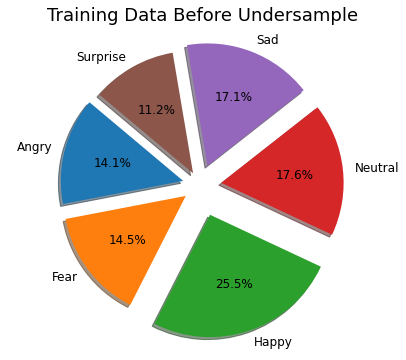

In [ ]:
checking_Unbiasity_MultiLabel(y_train, 'Training Data Before Undersample')

In [ ]:
def underSample(data, y_t):
  rus = RandomUnderSampler(random_state = 42) 
  X_res, y_res = rus.fit_resample(data, y_t)
  X_res = X_res.reshape(X_res.shape[0], img_size, img_size)
  return X_res, y_res

In [ ]:
X_train1, y_train1 = underSample(X_train.reshape(X_train.shape[0], img_size*img_size), y_train)

In [ ]:
print(X_train1.shape, y_train1.shape, X_test.shape, y_test.shape)

(19026, 48, 48) (19026,) (7067, 48, 48) (7067,)


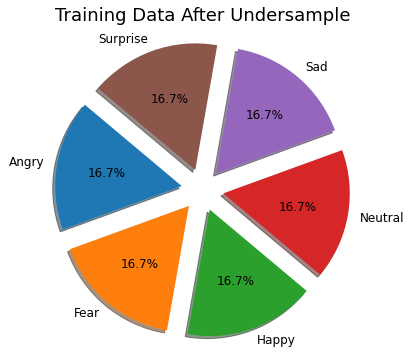

In [ ]:
checking_Unbiasity_MultiLabel(y_train1, 'Training Data After Undersample')

In [ ]:
X = np.concatenate((X_train, X_test))
data = pd.DataFrame(X.reshape((X.shape[0], X.shape[1]*X.shape[2])))
data['label'] = np.concatenate((y_train, y_test))

In [ ]:
data = data.sample(frac=1, random_state=42)

In [ ]:
X = data.iloc[:,:-1].values
X = X.reshape((X.shape[0], img_size, img_size, 1))
y = data.iloc[:,-1].values

## Ensembled Data

In [ ]:
X = np.array(X_train1)
data = pd.DataFrame(X.reshape((X.shape[0], X.shape[1]*X.shape[2])))
data['label'] = y_train1
data = data.sample(frac=1, random_state=42)
X = data.iloc[:,:-1].values
X = X.reshape((X.shape[0], img_size, img_size, 1))
y = data.iloc[:,-1].values

In [ ]:
def convert_to_single_label_data(y, lbl):
  for i in range(len(y)):
    if y[i] == lbl:
      y[i] = 1
    else:
      y[i] = 0
  return y

In [ ]:
np.unique(y)

array([0, 2, 3, 4, 5, 6])

In [ ]:
y_happy = convert_to_single_label_data(np.array(y), 6)

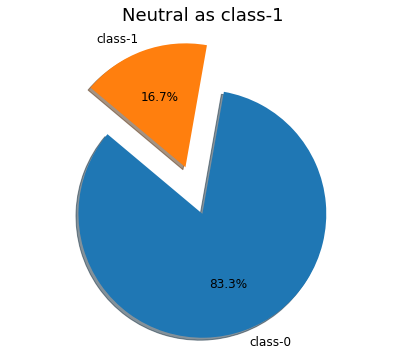

In [ ]:
checking_Unbiasity_BinaryLabel(y_happy, 'Neutral as class-1')

In [ ]:
# X1, y_happy1 = underSample(X.reshape(X.shape[0], img_size*img_size), y_happy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


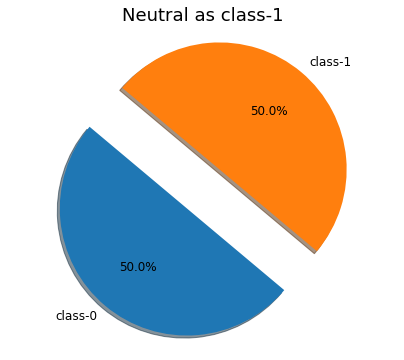

In [ ]:
checking_Unbiasity_BinaryLabel(y_happy1, 'Neutral as class-1')

1


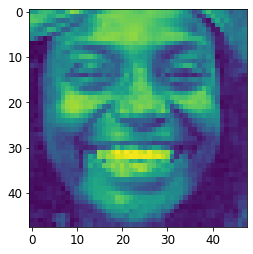

In [ ]:
plt.imshow(X1[6000].reshape(48, 48))
print(y_happy1[6000])

In [ ]:
data = pd.DataFrame(X1.reshape((X1.shape[0], X1.shape[1]*X1.shape[2])))
data['label'] = y_happy1
data = data.sample(frac=1, random_state=42)
X1 = data.iloc[:,:-1].values
X1 = X1.reshape((X1.shape[0], img_size, img_size, 1))
y_happy1 = data.iloc[:,-1].values

In [ ]:
y_angry

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
y_happy

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_neutral

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_sad

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_surprise

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_happy, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5717, 48, 48, 1) (5717,) (636, 48, 48, 1) (636,)


In [ ]:
num_classes = np.unique(y_train).shape[0]
y_train1 = np_utils.to_categorical(y_train, num_classes)
y_test1 = np_utils.to_categorical(y_test, num_classes)

In [ ]:
print(X_train.shape, y_train1.shape, X_test.shape, y_test1.shape)

(6185, 48, 48, 1) (6185, 2) (2651, 48, 48, 1) (2651, 2)


## Other preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28709, 48, 48, 1) (28709,) (7178, 48, 48, 1) (7178,)


In [ ]:
X_train_1 = X_train[:10000]
y_train_1 = y_train[:10000]

In [ ]:
X_test_1 = X_test[:2000]
y_test_1 = y_test[:2000]

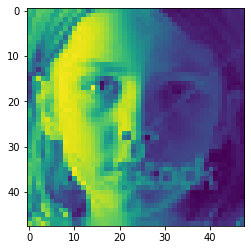

In [ ]:
image_indx = 60
plt.imshow(X_train_1[image_indx].reshape(48, 48))

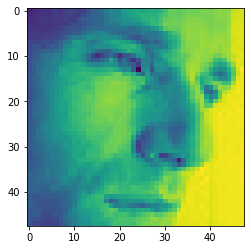

In [ ]:
image_indx = 1011
plt.imshow(X_train_1[image_indx].reshape(48, 48))

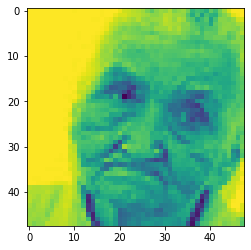

In [ ]:
image_indx = 6101
plt.imshow(X_train_1[image_indx].reshape(48, 48))

In [ ]:
def toRGB(X):
  gray_image = X[0].reshape(48, 48)
  backtorgb = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
  x = np.array(backtorgb, ndmin=4)
  for i in range(1, len(X)):
    gray_image = X[i].reshape(48, 48)
    backtorgb = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
    x1 = np.array(backtorgb, ndmin=4)
    x = np.concatenate((x, x1))
    if i%1000 == 0:
      print(i)
  return x

In [ ]:
X_train_RGB = toRGB(X_train_1)

1000
2000
3000
4000
5000
6000
7000
8000
9000


In [ ]:
X_test_RGB = toRGB(X_test_1)

1000


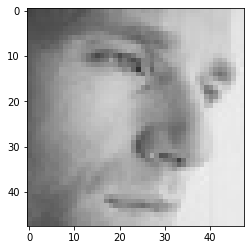

In [ ]:
image_indx = 1011
plt.imshow(X_train_RGB[image_indx])

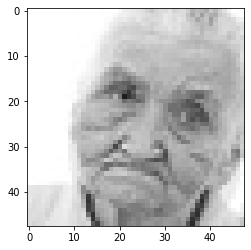

In [ ]:
image_indx = 6101
plt.imshow(X_train_RGB[image_indx])

In [ ]:
np.unique(y_train)

array([0, 2, 3, 4, 5, 6])

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
class_labels = le.classes_
print(class_labels)

[0 1 2 3 4 5 6]


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [ ]:
num_classes = np.unique(y_train).shape[0]
y_train1 = np_utils.to_categorical(y_train, num_classes)
y_test1 = np_utils.to_categorical(y_test, num_classes)

In [ ]:
print(X_train.shape, y_train1.shape, X_test.shape, y_test1.shape)

(28709, 48, 48, 1) (28709, 7) (7178, 48, 48, 1) (7178, 7)


# CNN Model 1 (Best Model)

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=50, validation_data=(X_test, y_test1))

Epoch 1/50
898/898 [==============================] - 11s 11ms/step - loss: 2.1452 - accuracy: 0.2494 - val_loss: 1.5363 - val_accuracy: 0.4076
Epoch 2/50
898/898 [==============================] - 9s 10ms/step - loss: 1.5282 - accuracy: 0.4097 - val_loss: 1.3634 - val_accuracy: 0.4713
Epoch 3/50
898/898 [==============================] - 9s 10ms/step - loss: 1.3781 - accuracy: 0.4737 - val_loss: 1.2827 - val_accuracy: 0.5011
Epoch 4/50
898/898 [==============================] - 9s 10ms/step - loss: 1.3074 - accuracy: 0.5016 - val_loss: 1.2563 - val_accuracy: 0.5157
Epoch 5/50
898/898 [==============================] - 9s 10ms/step - loss: 1.2555 - accuracy: 0.5250 - val_loss: 1.3634 - val_accuracy: 0.4929
Epoch 6/50
898/898 [==============================] - 9s 10ms/step - loss: 1.2024 - accuracy: 0.5434 - val_loss: 1.1449 - val_accuracy: 0.5644
Epoch 7/50
898/898 [==============================] - 9s 10ms/step - loss: 1.1784 - accuracy: 0.5567 - val_loss: 1.1674 - val_accuracy: 0.543

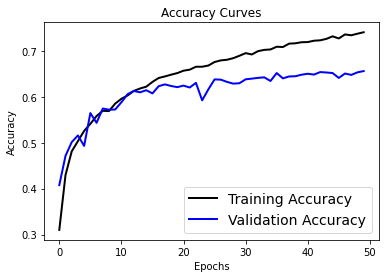

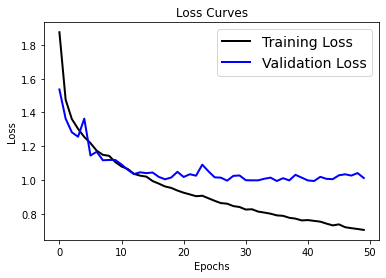

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], "Accuracy")
plotting_epochs(history.history['loss'], history.history['val_loss'], "Loss")

In [ ]:
# model.save('/content/drive/MyDrive/IR/IR_Project_Midsem/Model2.h5')

In [ ]:
best_model = load_model('/content/drive/MyDrive/IR/IR_Project/Model2.h5')

In [ ]:
history = best_model.fit(X_train, y_train1, batch_size=32, epochs=10, validation_data=(X_test, y_test1))

Epoch 1/10
898/898 [==============================] - 24s 25ms/step - loss: 0.6947 - accuracy: 0.7454 - val_loss: 1.0074 - val_accuracy: 0.6556
Epoch 2/10
898/898 [==============================] - 22s 25ms/step - loss: 0.6964 - accuracy: 0.7437 - val_loss: 1.0322 - val_accuracy: 0.6617
Epoch 3/10
898/898 [==============================] - 22s 25ms/step - loss: 0.6894 - accuracy: 0.7453 - val_loss: 1.0330 - val_accuracy: 0.6505
Epoch 4/10
898/898 [==============================] - 22s 25ms/step - loss: 0.6831 - accuracy: 0.7457 - val_loss: 1.0433 - val_accuracy: 0.6541
Epoch 5/10
898/898 [==============================] - 22s 25ms/step - loss: 0.6887 - accuracy: 0.7470 - val_loss: 1.0040 - val_accuracy: 0.6599
Epoch 6/10
898/898 [==============================] - 22s 25ms/step - loss: 0.6750 - accuracy: 0.7519 - val_loss: 1.0519 - val_accuracy: 0.6531
Epoch 7/10
898/898 [==============================] - 22s 25ms/step - loss: 0.6822 - accuracy: 0.7497 - val_loss: 1.0320 - val_accuracy:

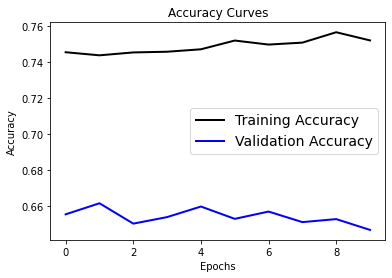

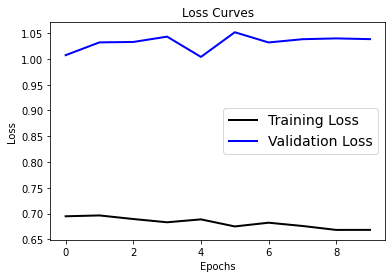

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], "Accuracy")
plotting_epochs(history.history['loss'], history.history['val_loss'], "Loss")

In [ ]:
best_model.evaluate(X_test, y_test1)

225/225 [==============================] - 26s 114ms/step - loss: 1.0119 - accuracy: 0.6558


[1.0118964910507202, 0.6557536721229553]

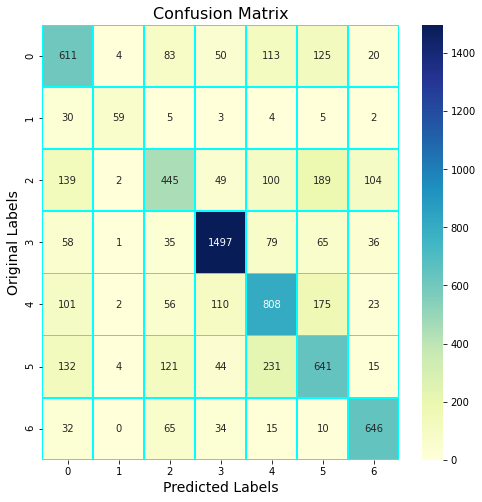

F1-Score: 0.656


In [ ]:
predictions = best_model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (8,8))
print('F1-Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))

#CNN Model 2 (Reduced Overfitting)

In [ ]:
model = Sequential()

model.add(layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=100, validation_data=(X_test, y_test1))

Epoch 1/100


In [ ]:
model.evaluate(X_test,y_test1)

In [ ]:
# model.save('/content/gdrive/MyDrive/IR_mid_project/model_with_64accuracy.h5')

In [ ]:
loadmodel=load_model('/content/drive/MyDrive/IR/IR_mid_project/model_with_64accuracy.h5')

In [ ]:
loadmodel.evaluate(X_test,y_test1)

225/225 [==============================] - 12s 50ms/step - loss: 0.9871 - accuracy: 0.6407


[0.9870951175689697, 0.6407077312469482]

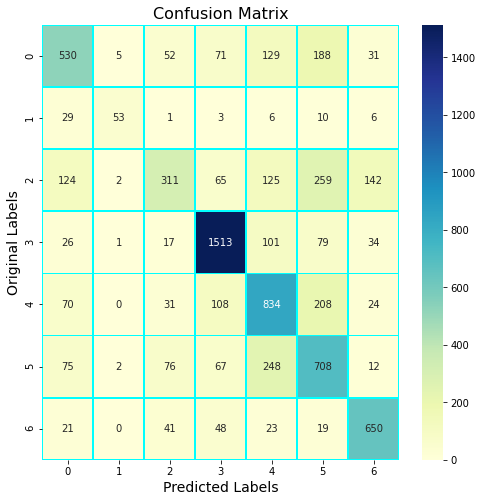

F1-Score: 0.641


In [ ]:
predictions = loadmodel.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (8,8))
print('F1-Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))

#CNN Model 3

In [ ]:
model = Sequential()

model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu",input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(num_classes,activation="softmax"))

model.summary()


In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=50, validation_data=(X_test, y_test1))

In [ ]:
# model.save('/content/gdrive/MyDrive/IR_mid_project/model2.h5')

In [ ]:
model2=load_model('/content/drive/MyDrive/IR/IR_mid_project/model2.h5')

In [ ]:
model2.evaluate(X_test,y_test1)

225/225 [==============================] - 278s 1s/step - loss: 1.7562 - accuracy: 0.6167


[1.7561514377593994, 0.6167455911636353]

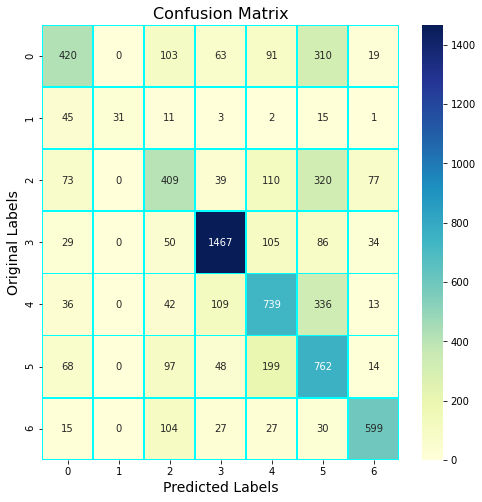

F1-Score: 0.617


In [ ]:
predictions = model2.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (8,8))
print('F1-Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))

#CNN Model 4

In [ ]:
model = Sequential()

model.add(layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation="softmax"))

model.summary()


In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=100, validation_data=(X_test, y_test1))

In [ ]:
# model.save('/content/gdrive/MyDrive/IR_mid_project/model3.h5')

In [ ]:
model3=load_model('/content/drive/MyDrive/IR/IR_mid_project/model3.h5')

In [ ]:
model3.evaluate(X_test, y_test1)

225/225 [==============================] - 14s 59ms/step - loss: 1.0245 - accuracy: 0.6431


[1.024482250213623, 0.6430760622024536]

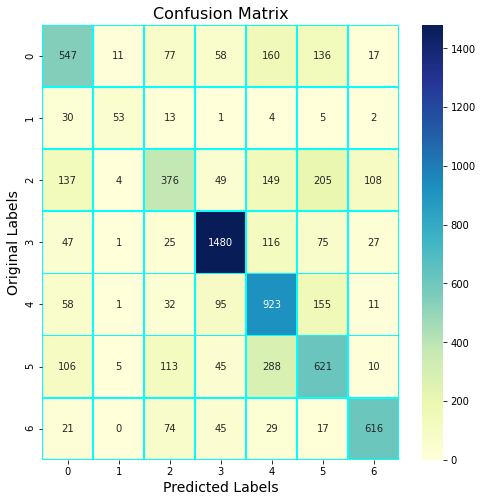

F1-Score: 0.643


In [ ]:
predictions = model3.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (8,8))
print('F1-Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))

#CNN Model 5

In [ ]:
model = Sequential()

model.add(layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=100, validation_data=(X_test, y_test1))

Epoch 1/100
898/898 [==============================] - 25s 25ms/step - loss: 1.8446 - accuracy: 0.2246 - val_loss: 1.7499 - val_accuracy: 0.2778
Epoch 2/100
898/898 [==============================] - 22s 25ms/step - loss: 1.6124 - accuracy: 0.3646 - val_loss: 1.4115 - val_accuracy: 0.4512
Epoch 3/100
898/898 [==============================] - 22s 25ms/step - loss: 1.4690 - accuracy: 0.4319 - val_loss: 1.7540 - val_accuracy: 0.3260
Epoch 4/100
898/898 [==============================] - 22s 25ms/step - loss: 1.3837 - accuracy: 0.4758 - val_loss: 1.3055 - val_accuracy: 0.4896
Epoch 5/100
898/898 [==============================] - 22s 24ms/step - loss: 1.3334 - accuracy: 0.4945 - val_loss: 1.3231 - val_accuracy: 0.4830
Epoch 6/100
898/898 [==============================] - 22s 25ms/step - loss: 1.3002 - accuracy: 0.5096 - val_loss: 1.3013 - val_accuracy: 0.5067
Epoch 7/100
898/898 [==============================] - 22s 25ms/step - loss: 1.2617 - accuracy: 0.5180 - val_loss: 1.2743 - val_ac

In [ ]:
# model.save('/content/gdrive/MyDrive/IR_mid_project/model4.h5')

In [ ]:
model4=load_model('/content/drive/MyDrive/IR/IR_mid_project/model4.h5')

In [ ]:
model4.evaluate(X_test, y_test1)

225/225 [==============================] - 15s 68ms/step - loss: 0.9814 - accuracy: 0.6307


[0.981417715549469, 0.6306770443916321]

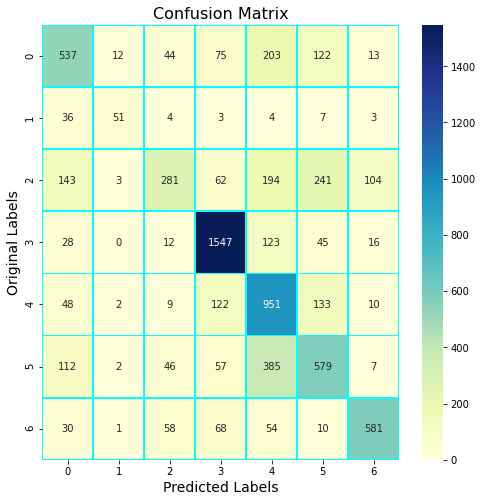

F1-Score: 0.631


In [ ]:
predictions = model4.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (8,8))
print('F1-Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))

# Xception Net(Baseline)

In [ ]:
Xception = keras.applications.xception.Xception(include_top=False, weights='imagenet', pooling='avg', classes=7)
Flatten  = keras.layers.Flatten()
Output   = keras.layers.Dense(7, activation="softmax")

XModel = tf.keras.Sequential([ Xception, Flatten, Output ])

for layer in Xception.layers[:-7]:
    layer.trainable = False

XModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = XModel.fit(X_train_RGB, y_train1, batch_size=32, epochs = 10, validation_data=(X_test_RGB, y_test1))

Epoch 1/10
313/313 [==============================] - 44s 30ms/step - loss: 1.8504 - accuracy: 0.2451 - val_loss: 1.8439 - val_accuracy: 0.2820
Epoch 2/10
313/313 [==============================] - 8s 26ms/step - loss: 1.7061 - accuracy: 0.3148 - val_loss: 1.6763 - val_accuracy: 0.3600
Epoch 3/10
313/313 [==============================] - 8s 26ms/step - loss: 1.6426 - accuracy: 0.3536 - val_loss: 1.8862 - val_accuracy: 0.2990
Epoch 4/10
313/313 [==============================] - 8s 27ms/step - loss: 1.6022 - accuracy: 0.3755 - val_loss: 1.6751 - val_accuracy: 0.3410
Epoch 5/10
313/313 [==============================] - 8s 27ms/step - loss: 1.5424 - accuracy: 0.4031 - val_loss: 1.6268 - val_accuracy: 0.3620
Epoch 6/10
313/313 [==============================] - 8s 26ms/step - loss: 1.4914 - accuracy: 0.4254 - val_loss: 1.7032 - val_accuracy: 0.3485
Epoch 7/10
313/313 [==============================] - 8s 26ms/step - loss: 1.4573 - accuracy: 0.4310 - val_loss: 1.6264 - val_accuracy: 0.379

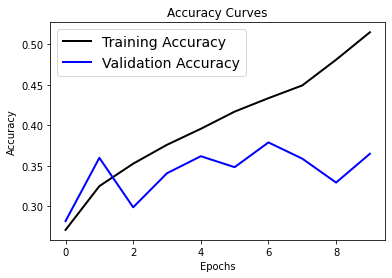

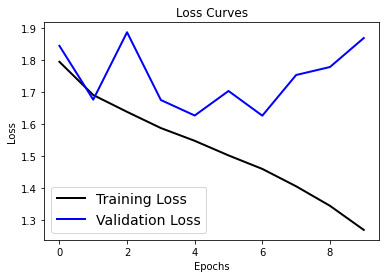

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
plotting_epochs(history.history['loss'], history.history['val_loss'], 'Loss')

In [ ]:
history = XModel.fit(X_train_RGB, y_train1, batch_size=32, epochs = 10, validation_data=(X_test_RGB, y_test1))

Epoch 1/10
313/313 [==============================] - 9s 27ms/step - loss: 1.1786 - accuracy: 0.5565 - val_loss: 1.8143 - val_accuracy: 0.3705
Epoch 2/10
313/313 [==============================] - 8s 26ms/step - loss: 1.0809 - accuracy: 0.5958 - val_loss: 2.0130 - val_accuracy: 0.3205
Epoch 3/10
313/313 [==============================] - 8s 26ms/step - loss: 0.9687 - accuracy: 0.6393 - val_loss: 1.9707 - val_accuracy: 0.3590
Epoch 4/10
313/313 [==============================] - 9s 27ms/step - loss: 0.8451 - accuracy: 0.6935 - val_loss: 2.3720 - val_accuracy: 0.3555
Epoch 5/10
313/313 [==============================] - 9s 28ms/step - loss: 0.7102 - accuracy: 0.7423 - val_loss: 2.2848 - val_accuracy: 0.3850
Epoch 6/10
313/313 [==============================] - 9s 27ms/step - loss: 0.5878 - accuracy: 0.7887 - val_loss: 2.3394 - val_accuracy: 0.3825
Epoch 7/10
313/313 [==============================] - 9s 28ms/step - loss: 0.4850 - accuracy: 0.8279 - val_loss: 2.8006 - val_accuracy: 0.3585

# Using Best CNN variant, trying different approaches

## CNN Model 1 with 4 emotion classes

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=50, validation_data=(X_test, y_test1))

Epoch 1/50
574/574 [==============================] - 41s 12ms/step - loss: 1.8024 - accuracy: 0.3152 - val_loss: 1.2030 - val_accuracy: 0.4631
Epoch 2/50
574/574 [==============================] - 6s 11ms/step - loss: 1.2295 - accuracy: 0.4708 - val_loss: 1.0470 - val_accuracy: 0.5413
Epoch 3/50
574/574 [==============================] - 6s 11ms/step - loss: 1.0608 - accuracy: 0.5397 - val_loss: 0.9788 - val_accuracy: 0.5688
Epoch 4/50
574/574 [==============================] - 6s 11ms/step - loss: 0.9912 - accuracy: 0.5760 - val_loss: 1.0650 - val_accuracy: 0.5509
Epoch 5/50
574/574 [==============================] - 6s 11ms/step - loss: 0.9528 - accuracy: 0.5926 - val_loss: 0.8749 - val_accuracy: 0.6311
Epoch 6/50
574/574 [==============================] - 6s 11ms/step - loss: 0.8947 - accuracy: 0.6269 - val_loss: 0.8436 - val_accuracy: 0.6494
Epoch 7/50
574/574 [==============================] - 6s 11ms/step - loss: 0.8782 - accuracy: 0.6356 - val_loss: 0.8324 - val_accuracy: 0.650

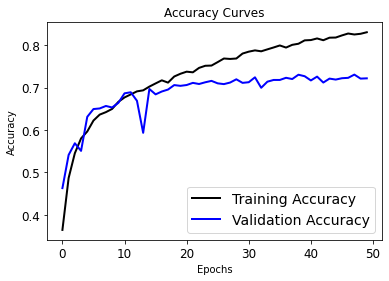

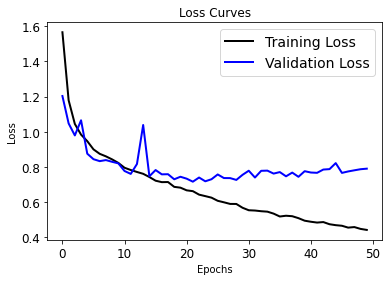

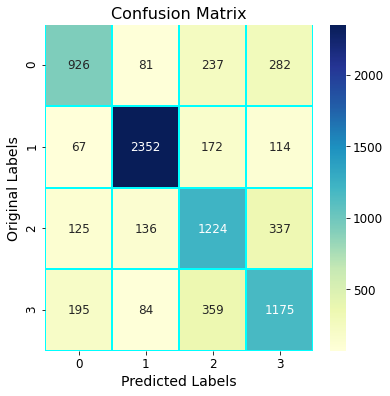

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
plotting_epochs(history.history['loss'], history.history['val_loss'], 'Loss')
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (6,6))

In [ ]:
model.save('/content/drive/MyDrive/IR/IR_Project/ModelOn4.h5')

In [ ]:
model1 = load_model('/content/drive/MyDrive/IR/IR_Project/ModelOn4.h5')
model1.evaluate(X_test, y_test1)

246/246 [==============================] - 1s 4ms/step - loss: 0.7282 - accuracy: 0.7358


[0.7282317280769348, 0.7358250617980957]

## Ensembling 5 emotion classes for better prediction

### Happy Model

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=30, validation_data=(X_test, y_test1))

Epoch 1/30
417/417 [==============================] - 6s 12ms/step - loss: 0.7651 - accuracy: 0.6591 - val_loss: 0.4092 - val_accuracy: 0.8411
Epoch 2/30
417/417 [==============================] - 5s 11ms/step - loss: 0.3842 - accuracy: 0.8448 - val_loss: 0.3162 - val_accuracy: 0.8735
Epoch 3/30
417/417 [==============================] - 5s 11ms/step - loss: 0.3174 - accuracy: 0.8742 - val_loss: 0.2820 - val_accuracy: 0.8854
Epoch 4/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2995 - accuracy: 0.8820 - val_loss: 0.2532 - val_accuracy: 0.9071
Epoch 5/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2766 - accuracy: 0.8920 - val_loss: 0.3249 - val_accuracy: 0.8695
Epoch 6/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2715 - accuracy: 0.8909 - val_loss: 0.2414 - val_accuracy: 0.9057
Epoch 7/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2572 - accuracy: 0.9003 - val_loss: 0.2284 - val_accuracy: 0.9180

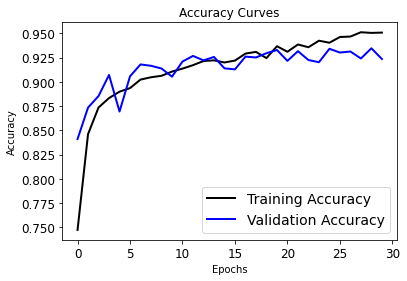

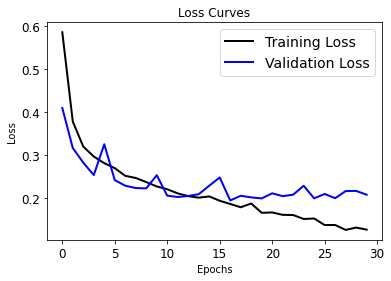

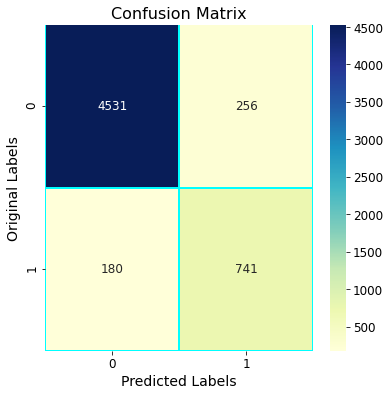

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
plotting_epochs(history.history['loss'], history.history['val_loss'], 'Loss')
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (6,6))

In [ ]:
# model.save('/content/drive/MyDrive/IR/IR_Project/HappyModel.h5')

### Angry Model

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)       

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=30, validation_data=(X_test, y_test1))

Epoch 1/30
417/417 [==============================] - 6s 12ms/step - loss: 0.7499 - accuracy: 0.6792 - val_loss: 0.4504 - val_accuracy: 0.8288
Epoch 2/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4618 - accuracy: 0.8302 - val_loss: 0.5201 - val_accuracy: 0.8287
Epoch 3/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4593 - accuracy: 0.8265 - val_loss: 0.5485 - val_accuracy: 0.8203
Epoch 4/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4556 - accuracy: 0.8332 - val_loss: 0.4729 - val_accuracy: 0.8280
Epoch 5/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4355 - accuracy: 0.8369 - val_loss: 0.4228 - val_accuracy: 0.8278
Epoch 6/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4253 - accuracy: 0.8319 - val_loss: 0.4172 - val_accuracy: 0.8292
Epoch 7/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4056 - accuracy: 0.8382 - val_loss: 0.4484 - val_accuracy: 0.8292

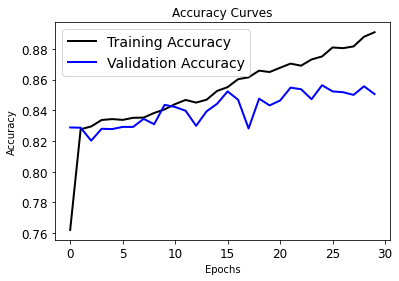

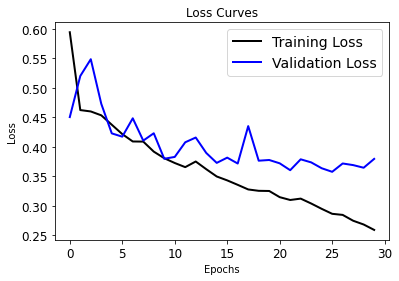

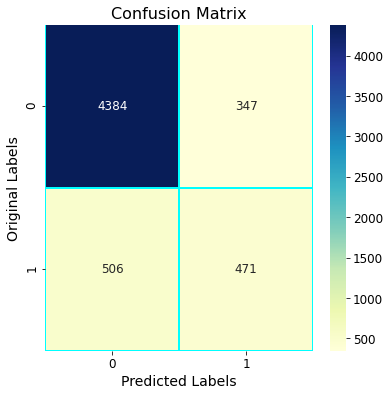

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
plotting_epochs(history.history['loss'], history.history['val_loss'], 'Loss')
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (6,6))

In [ ]:
model.save('/content/drive/MyDrive/IR/IR_Project/AngryModel.h5')

### Neutral Model

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=30, validation_data=(X_test, y_test1))

Epoch 1/30
417/417 [==============================] - 6s 12ms/step - loss: 0.7292 - accuracy: 0.6898 - val_loss: 0.4344 - val_accuracy: 0.8260
Epoch 2/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4516 - accuracy: 0.8272 - val_loss: 0.4263 - val_accuracy: 0.8266
Epoch 3/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4182 - accuracy: 0.8349 - val_loss: 0.6130 - val_accuracy: 0.8267
Epoch 4/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4264 - accuracy: 0.8262 - val_loss: 0.4165 - val_accuracy: 0.8281
Epoch 5/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4031 - accuracy: 0.8346 - val_loss: 0.4269 - val_accuracy: 0.8260
Epoch 6/30
417/417 [==============================] - 5s 11ms/step - loss: 0.3975 - accuracy: 0.8368 - val_loss: 0.3965 - val_accuracy: 0.8297
Epoch 7/30
417/417 [==============================] - 5s 11ms/step - loss: 0.3847 - accuracy: 0.8360 - val_loss: 0.4165 - val_accuracy: 0.8257

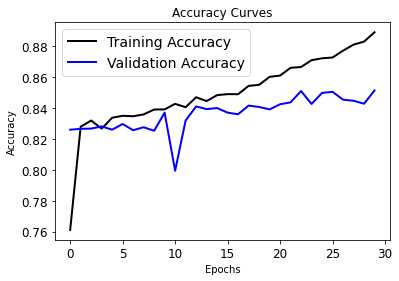

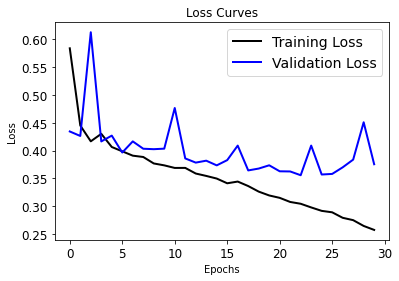

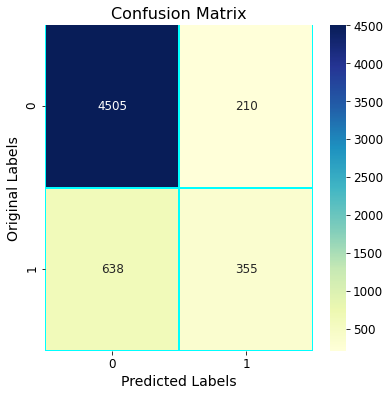

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
plotting_epochs(history.history['loss'], history.history['val_loss'], 'Loss')
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (6,6))

In [ ]:
model.save('/content/drive/MyDrive/IR/IR_Project/NeutralModel.h5')

### Sad Model

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_35 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=30, validation_data=(X_test, y_test1), class_weight=class_weights)

Epoch 1/30
417/417 [==============================] - 6s 12ms/step - loss: 0.7518 - accuracy: 0.6905 - val_loss: 0.4541 - val_accuracy: 0.8318
Epoch 2/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4662 - accuracy: 0.8283 - val_loss: 0.4413 - val_accuracy: 0.8313
Epoch 3/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4366 - accuracy: 0.8317 - val_loss: 0.4738 - val_accuracy: 0.8253
Epoch 4/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4247 - accuracy: 0.8336 - val_loss: 0.5043 - val_accuracy: 0.7954
Epoch 5/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4643 - accuracy: 0.8197 - val_loss: 0.4512 - val_accuracy: 0.8320
Epoch 6/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4367 - accuracy: 0.8337 - val_loss: 0.4533 - val_accuracy: 0.8322
Epoch 7/30
417/417 [==============================] - 5s 11ms/step - loss: 0.4390 - accuracy: 0.8257 - val_loss: 0.4658 - val_accuracy: 0.8218

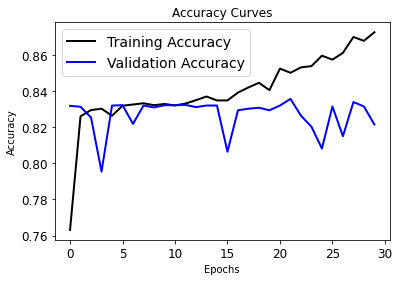

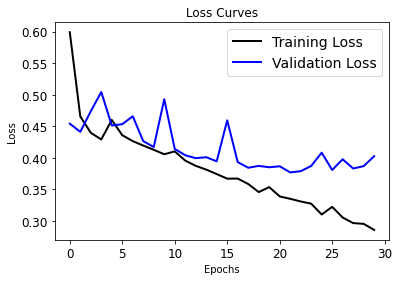

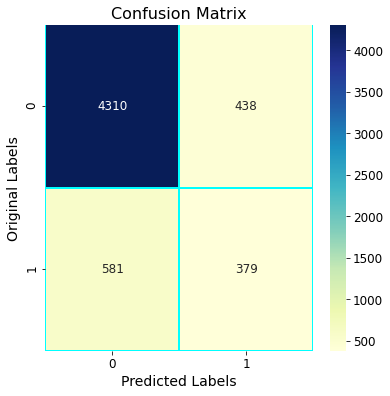

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
plotting_epochs(history.history['loss'], history.history['val_loss'], 'Loss')
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (6,6))

In [ ]:
class_weights = {0:1.05, 1:1.07}
history = model.fit(X_train, y_train1, batch_size=32, epochs=5, validation_data=(X_test, y_test1), class_weight=class_weights)

Epoch 1/5
194/194 [==============================] - 6s 29ms/step - loss: 0.2517 - accuracy: 0.8999 - val_loss: 0.7992 - val_accuracy: 0.7178
Epoch 2/5
194/194 [==============================] - 5s 28ms/step - loss: 0.2147 - accuracy: 0.9193 - val_loss: 0.8059 - val_accuracy: 0.7220
Epoch 3/5
194/194 [==============================] - 5s 28ms/step - loss: 0.2086 - accuracy: 0.9185 - val_loss: 0.7960 - val_accuracy: 0.7167
Epoch 4/5
194/194 [==============================] - 5s 28ms/step - loss: 0.2106 - accuracy: 0.9234 - val_loss: 0.7906 - val_accuracy: 0.7239
Epoch 5/5
194/194 [==============================] - 5s 28ms/step - loss: 0.1978 - accuracy: 0.9266 - val_loss: 0.8317 - val_accuracy: 0.7054


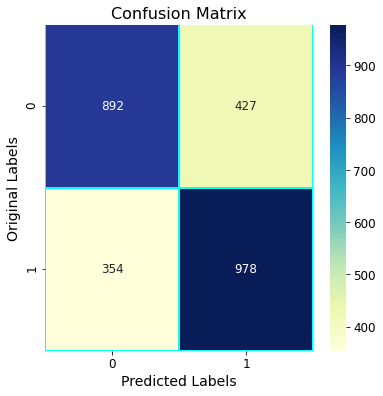

In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (6,6))

In [ ]:
model.save('/content/drive/MyDrive/IR/IR_Project/SadModel.h5')

### Surprise Model

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_42 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=32, epochs=30, validation_data=(X_test, y_test1))

Epoch 1/30
417/417 [==============================] - 6s 12ms/step - loss: 0.7073 - accuracy: 0.7036 - val_loss: 0.3272 - val_accuracy: 0.8786
Epoch 2/30
417/417 [==============================] - 5s 11ms/step - loss: 0.3440 - accuracy: 0.8639 - val_loss: 0.3158 - val_accuracy: 0.8893
Epoch 3/30
417/417 [==============================] - 5s 11ms/step - loss: 0.3029 - accuracy: 0.8825 - val_loss: 0.2914 - val_accuracy: 0.8845
Epoch 4/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2889 - accuracy: 0.8889 - val_loss: 0.2571 - val_accuracy: 0.9008
Epoch 5/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2764 - accuracy: 0.8912 - val_loss: 0.2663 - val_accuracy: 0.9017
Epoch 6/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2579 - accuracy: 0.8980 - val_loss: 0.2624 - val_accuracy: 0.9049
Epoch 7/30
417/417 [==============================] - 5s 11ms/step - loss: 0.2578 - accuracy: 0.8995 - val_loss: 0.2419 - val_accuracy: 0.9108

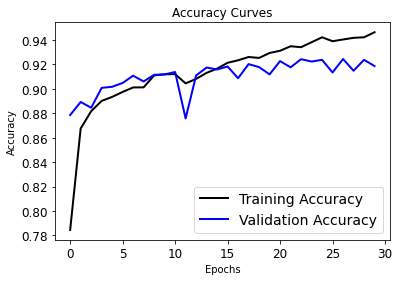

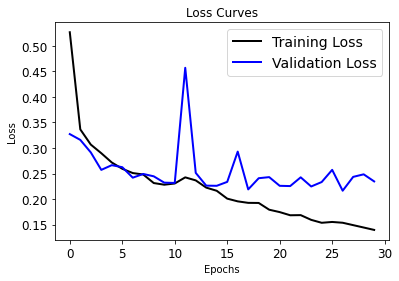

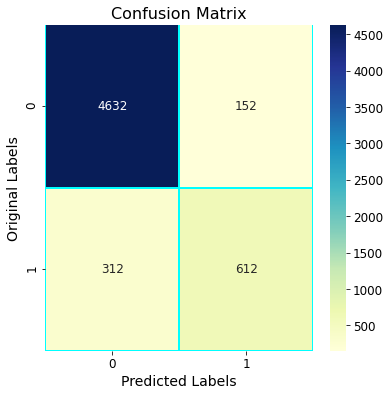

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
plotting_epochs(history.history['loss'], history.history['val_loss'], 'Loss')
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
heatMap(y_test, y_pred, (6,6))

In [ ]:
model.save('/content/drive/MyDrive/IR/IR_Project/SurpriseModel.h5')

### Combining All and Checking Accuracy

In [ ]:
happy_mdl = load_model('/content/drive/MyDrive/IR/IR_Project/HappyModel.h5')
sad_mdl = load_model('/content/drive/MyDrive/IR/IR_Project/SadModel.h5')
angry_mdl = load_model('/content/drive/MyDrive/IR/IR_Project/AngryModel.h5')
neutral_mdl = load_model('/content/drive/MyDrive/IR/IR_Project/NeutralModel.h5')
surprise_mdl = load_model('/content/drive/MyDrive/IR/IR_Project/SurpriseModel.h5')

In [ ]:
def predict_ensemble(X_test):
  
  emotions = {0:'angry', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}
  # plt.imshow(image.reshape(48, 48))
  # print('Original Emotion: ',emotions[original_label])
  y_pred = []
  for i in range(len(X_test)):
    image = X_test[i]
    prob_emo = 0
    emo = -1
    predictions = neutral_mdl.predict(image.reshape(1, 48, 48, 1))[0, 1]
    # print('Neutral', predictions)
    if prob_emo < predictions:
      emo = 2
      prob_emo = predictions
    predictions = sad_mdl.predict(image.reshape(1, 48, 48, 1))[0, 1]
    # print('Sad', predictions)
    if prob_emo < predictions:
      emo = 3
      prob_emo = predictions
    predictions = angry_mdl.predict(image.reshape(1, 48, 48, 1))[0, 1]
    # print('Angry', predictions)
    if prob_emo < predictions:
      emo = 0
      prob_emo = predictions
    predictions = happy_mdl.predict(image.reshape(1, 48, 48, 1))[0, 1]
    # print('Happy', predictions)
    if prob_emo < predictions:
      emo = 1
      prob_emo = predictions
    
    predictions = surprise_mdl.predict(image.reshape(1, 48, 48, 1))[0, 1]
    # print('Surprise', predictions)
    if prob_emo < predictions:
      emo = 4
      prob_emo = predictions
    y_pred.append(emo)
  
  return np.array(y_pred)

In [ ]:
y_pred = predict_ensemble(X_test)

In [ ]:
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))
print('F1-Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))

Accuracy: 75.281%
F1-Score: 0.753


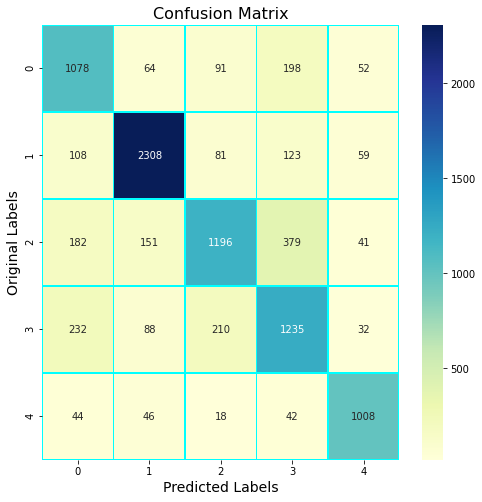

In [ ]:
heatMap(y_test, y_pred, (8, 8))

# Music Recommendation

In [ ]:
google_sheet_id = '1AmlOC6RN-pYKdU6nU2e2dmxXPYhJGc3zWknkKQFt9O4'
worksheetname = 'IR_Playlist_Data'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(google_sheet_id, worksheetname)

In [ ]:
data = pd.read_csv(URL)

In [ ]:
playlist = data.iloc[:, :].values

Emotion to Genre Mappings

In [ ]:
mappings = {
    0: ['Instrumental', 'Classical', 'Ballad'],
    1: ['Ballad', 'Instrumental', 'Rock'],
    2: ['EDM', 'Jazz', 'Rock', 'Pop'],
    3: ['Pop', 'Rock', 'EDM', 'Blues', 'Hip Hop'],
    4: ['Classical', 'Instrumental', 'Ballad'],
    5: ['Folk', 'Rock', 'Pop'],
    6: ['EDM', 'Rock', 'Jazz']
}

Suggestions based on emotion detected

In [ ]:
def suggest(emotion, intensity):
  emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
  emotion_label = emotions[emotion]
  list_data = []
  genres = playlist[:, 2]
  i = 0
  if intensity > 0.35 and intensity < 0.65:
    i=0
  elif intensity >= 0.65 and intensity < 0.85:
    i=1
  else:
    i=2
  i = mappings[emotion_label][i]
  for j in range(len(genres)):
    if genres[j] == i:
      list_data.append(playlist[j])
  random.shuffle(list_data)
  print('We suggest you this playlist:', list_data[0][1])
  print('Genre:', list_data[0][2])
  print('Artist:', list_data[0][3])
  print('Language:', list_data[0][4])

In [ ]:
n = random.randint(0, 7000)
emotion, intensity = predict_emotion(model, X_test[n])
plt.imshow(X_test[n].reshape(48, 48))
suggest(emotion, intensity)

In [ ]:
suggest(emotion, intensity)

We suggest you this playlist: https://gaana.com/playlist/gaana-dj-atif-aslam-romantic-hits
Genre: Ballad
Artist: Atif Aslam
Language: Hindi
